In [3]:
import random
import numpy
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def roll_d6():
    return int(random.randint(1,6))

def roll_d6_reroll_1and2():
    result = roll_d6()
    if result > 3:
        return result
    return roll_d6()

def roll_dice(how_many, rule):
    dice = [1] * how_many
    return reduce(lambda x,y: x+y, map(rule, dice))

def roll_Nd6(number, number_of_dice):
    rule = lambda x: roll_d6()
    rolls = numpy.zeros(number_of_dice * 6)
    for i in range(0, number):
        roll = roll_dice(number_of_dice, rule)
        rolls[roll-1] += 1
    return (rolls/number)

def roll_Nd6_reroll_1_and_2(number, number_of_dice):
    rule = lambda x: roll_d6_reroll_1and2()
    rolls = numpy.zeros(number_of_dice * 6)
    for i in range(0, number):
        roll = roll_dice(number_of_dice, rule)
        rolls[roll-1] += 1
    return (rolls/number)

def roll_Nd6_reroll_1_and_2_and_fate_blessed(number, number_of_dice):
    reroll_threshold = (number_of_dice * 6) / 2
    rule = lambda x: roll_d6_reroll_1and2()
    rolls = numpy.zeros(number_of_dice * 6)
    for i in range(0, number):
        roll = roll_dice(number_of_dice, rule)
        if roll < reroll_threshold:
            roll = roll_dice(number_of_dice, rule)
        
        rolls[roll-1] += 1
    return (rolls/number)

def roll_Nd6_and_fate_blessed(number, number_of_dice):
    reroll_threshold = (number_of_dice * 6) / 2
    reroll_threshold = 11

    print(reroll_threshold)
    rule = lambda x: roll_d6()
    rolls = numpy.zeros(number_of_dice * 6)
    for i in range(0, number):
        roll = roll_dice(number_of_dice, rule)
        if roll < reroll_threshold:
            roll = roll_dice(number_of_dice, rule)
        
        rolls[roll-1] += 1
    return (rolls/number)

## 4W6

Hier die Ergebnisse für 4W6.

<Container object of 24 artists>

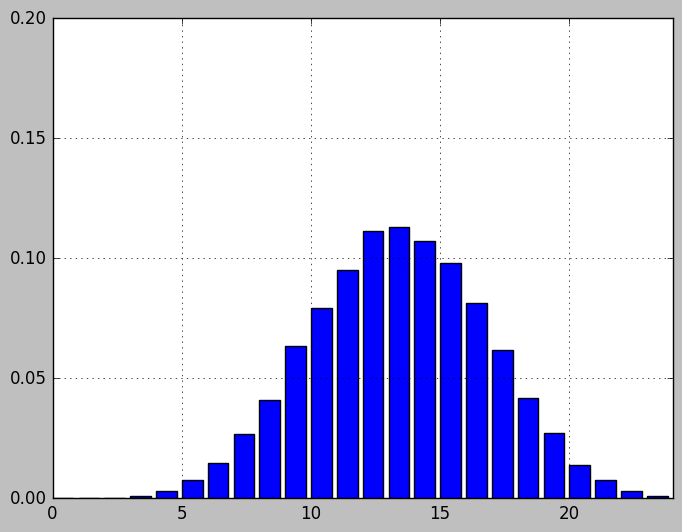

In [4]:
result4d6 = roll_Nd6(50000, 4)
fig, ax = plt.subplots()
x_max = 4*6
ax.set_ylim([0,.2])
ax.set_xlim([0,x_max])
ax.grid(True)
ax.bar(np.arange(6*4), result4d6)

## Reroll 1 and 2

Das hier ist das Ergebnis für das Calandra Feat.
Hier wurde **nicht** mit Fate Blessed gerechnet.

<Container object of 18 artists>

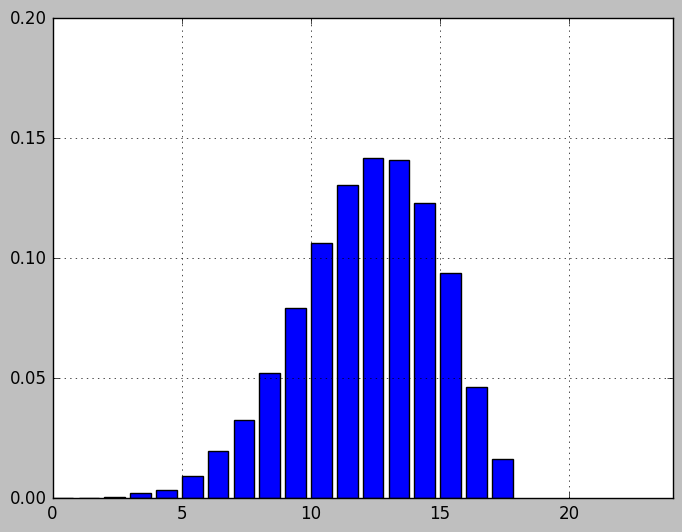

In [5]:
result_1and2_rerolled = roll_Nd6_reroll_1_and_2(50000, 3)
fig, ax = plt.subplots()
ax.set_ylim([0,.2])
ax.set_xlim([0,x_max])
ax.grid(True)
ax.bar(np.arange(6*3), result_1and2_rerolled)

## Reroll 1 and 2 with Fate Blessed

Das hier ist das Ergebnis für das Calandra Feat.
Hier wurde **mit** Fate Blessed gerechnet.

<Container object of 18 artists>

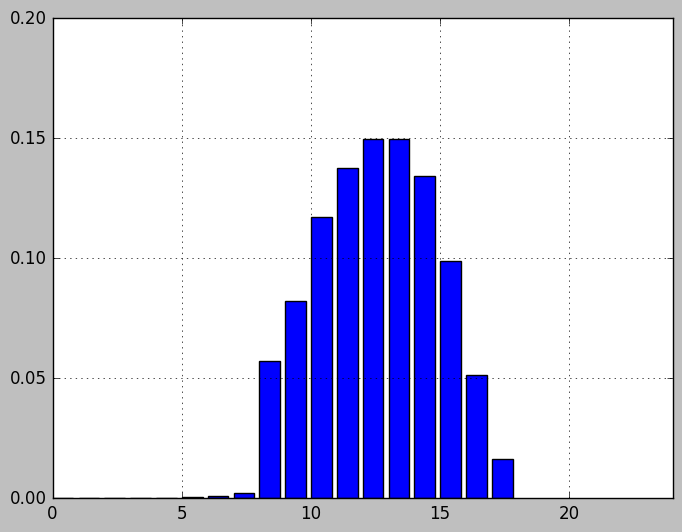

In [6]:
result_1and2_rerolled_andFB = roll_Nd6_reroll_1_and_2_and_fate_blessed(50000, 3)
fig, ax = plt.subplots()
ax.set_ylim([0,.2])
ax.set_xlim([0,x_max])
ax.grid(True)
ax.bar(np.arange(6*3), result_1and2_rerolled_andFB)

## Reroll 1 and 2 with Fate Blessed

Das hier ist das Ergebnis für das Calandra Feat.
Hier wurde **mit** Fate Blessed gerechnet.

11


<Container object of 18 artists>

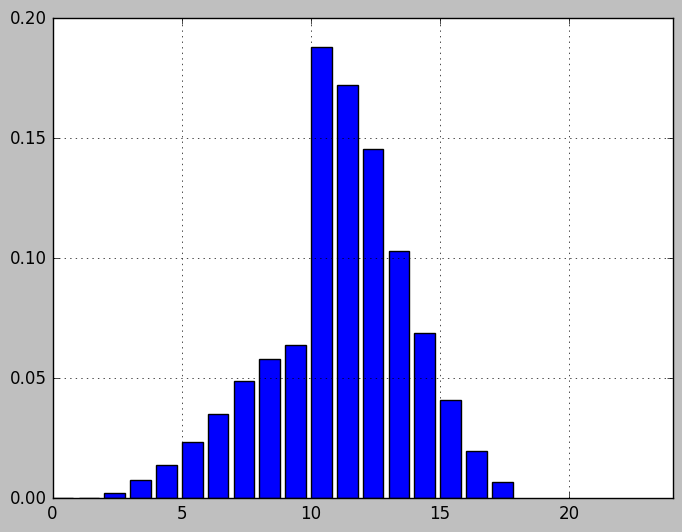

In [7]:
result = roll_Nd6_and_fate_blessed(50000, 3)
fig, ax = plt.subplots()
ax.set_ylim([0,.2])
ax.set_xlim([0,x_max])
ax.grid(True)
ax.bar(np.arange(6*3), result)

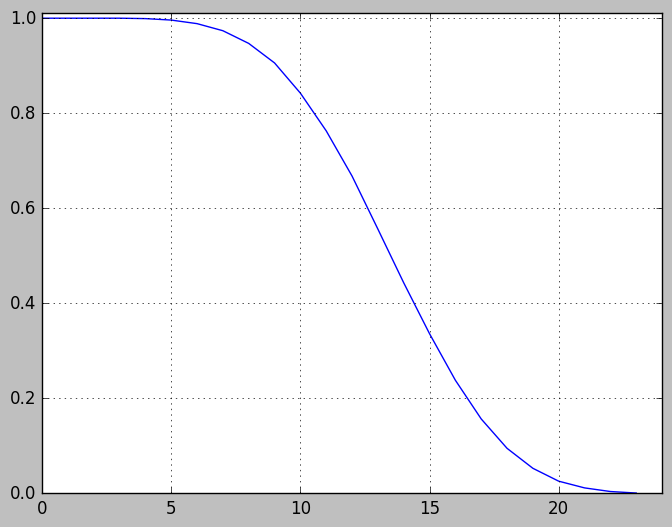

In [8]:
def accumulate(series):
    b=np.zeros(len(series))
    i = 0
    for value in series:
        b[i] = reduce(lambda x,y: x+y, series[i:])
        i+=1
    return b

points=accumulate(result4d6)
fig, ax = plt.subplots()
ax.set_ylim([0,1.01])
ax.set_xlim([0,x_max])
ax.grid(True)
ax.plot(np.arange(x_max), points)

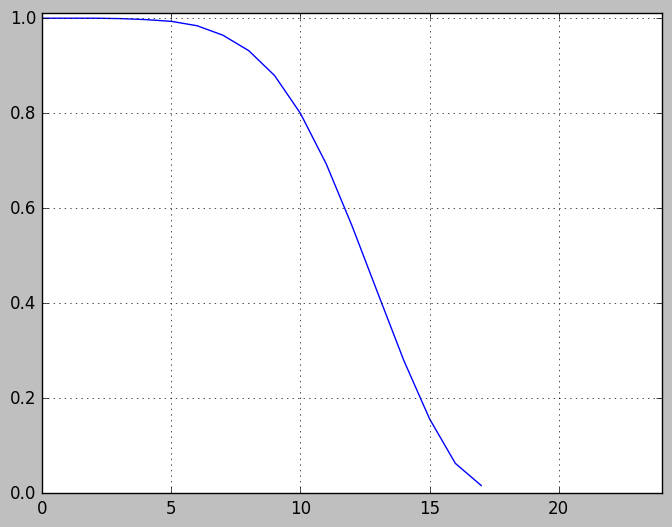

In [9]:
points=accumulate(result_1and2_rerolled)
fig, ax = plt.subplots()
ax.set_ylim([0,1.01])
ax.set_xlim([0,x_max])
ax.grid(True)
ax.plot(np.arange(3*6), points)

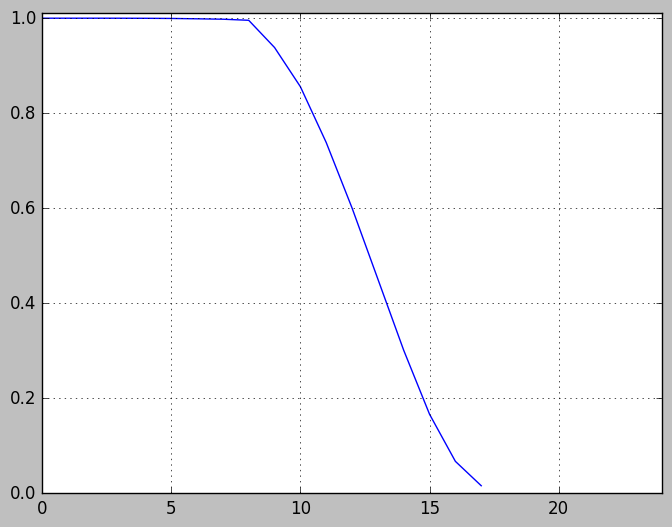

In [10]:
points=accumulate(result_1and2_rerolled_andFB)
fig, ax = plt.subplots()
ax.set_ylim([0,1.01])
ax.set_xlim([0,x_max])
ax.grid(True)
ax.plot(np.arange(3*6), points)